# Problem setting: Maze Solving

This notebook demonstrates a simple maze solving algorithm based on Q-Learning.

First of all, the maze map must be generated. This algorithm allow the agent to search the goal in maze by reward value in each point in 2D map.

The following is an example of map.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# The number of records.
map_row = 25
# The number of columns.
map_col = 25

# `#` is wall in maze.
# `S` is a start point.
# `G` is a goal.
# `@` is the agent.
start_point_label, end_point_label, wall_label, agent_label = ("S", "G", "#", "@")

In [8]:
# The reward values can be generated by random sampling.
real_map_arr = np.random.normal(5, 2, size=(map_row, map_col))
real_map_arr = np.round(real_map_arr, 1)

map_arr = real_map_arr.astype(object)

# For visualization.
real_map_arr = map_arr[1:map_row-1, 1:map_row-1]
real_map_arr = real_map_arr.astype(np.float64)

# For learning.
map_arr[:, 0] = wall_label
map_arr[0, :] = wall_label
map_arr[-1, :] = wall_label
map_arr[:, -1] = wall_label
map_arr[map_row-2, map_col-2] = end_point_label
map_arr[1, 1] = start_point_label

In [9]:
# The start point.
real_map_arr[0, 0] = -1.0
# The end point(Goal).
real_map_arr[map_row-3, map_col-3] = -1.0

In relation to reinforcement learning, the state of agent is 2-d position coordinates and the action is to dicide the direction of movement. Within the wall, the agent is movable in a cross direction and can advance by one point at a time. After moving into a new position, the agent can obtain a reward. On greedy searching, this extrinsically motivated agent performs in order to obtain some reward as high as possible. Each reward value is plot in map.

The map data that agent will observe is as follow.

In [45]:
map_arr

array([['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#',
        '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
       ['#', 'S', 6.8, 9.9, 6.9, 3.3, 7.3, 7.9, 5.7, 5.3, 4.7, 6.4, 5.8,
        4.4, 1.6, 4.3, 3.8, 4.1, 5.7, 7.2, 7.0, 1.9, 8.1, 2.1, '#'],
       ['#', 4.7, -0.2, 1.5, 3.7, 5.0, 1.3, 8.8, 7.7, 7.8, 5.3, 5.3, 2.1,
        4.7, 5.5, 1.5, 7.0, 1.7, 3.3, 1.9, 7.1, 4.6, 6.7, 1.0, '#'],
       ['#', 3.6, 3.7, 7.7, 3.8, 5.9, 3.2, 3.7, 4.0, 4.8, 4.5, 1.7, 2.1,
        4.8, 1.5, 4.1, 5.7, 4.9, 2.8, 6.2, 5.3, 5.9, 6.7, 2.9, '#'],
       ['#', 5.6, 8.2, 2.9, 5.9, 5.5, 5.0, 5.6, 4.4, 3.9, 5.3, 4.1, 2.9,
        3.0, 7.4, 3.7, 6.7, 2.0, 1.7, 2.5, 5.6, 4.8, 5.7, 8.5, '#'],
       ['#', 7.6, 4.5, 3.1, 5.7, 5.6, 6.2, 2.8, 6.3, 4.1, 6.1, 3.0, 5.7,
        4.5, 4.1, 5.6, 1.0, 6.0, 4.2, 5.6, 7.2, 2.3, 3.2, 5.5, '#'],
       ['#', 4.6, 5.5, 6.3, 7.0, 5.0, 2.1, 1.3, 7.6, 2.2, 4.8, 3.3, 6.7,
        3.0, 6.4, 3.4, 6.6, 2.3, 6.5, 3.0, 6.8, 6.9, 11.5, 7.8, '#'],
    

The reward values in the map data can be visualized as follow.

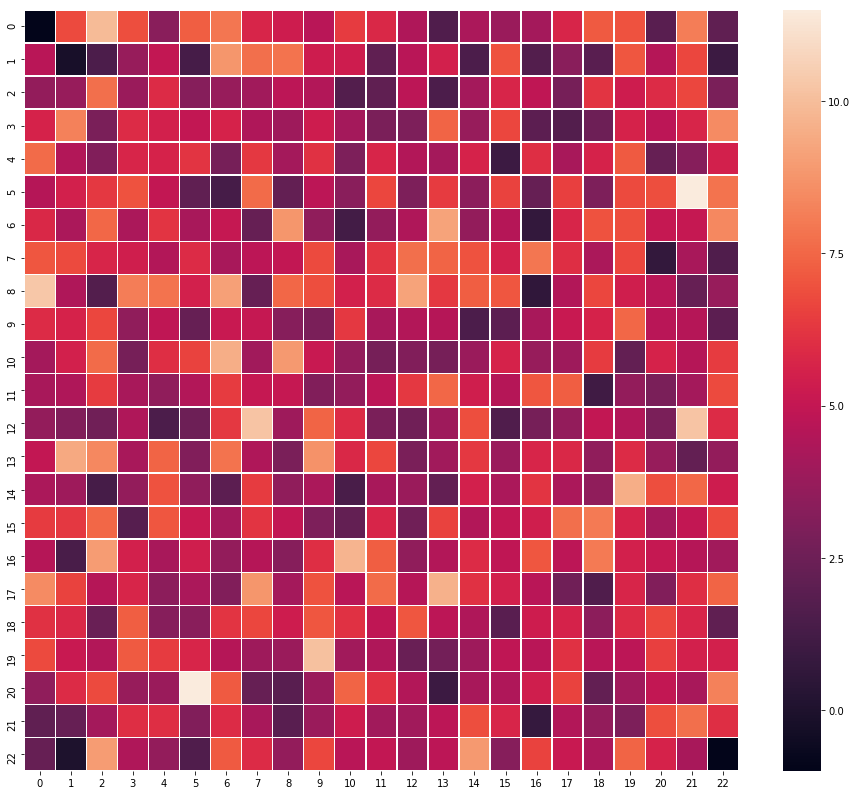

In [51]:
fig = plt.figure(figsize=(16, 14))
sns.heatmap(real_map_arr, linewidths=.5)
plt.show();plt.close()

## Problem Solution: Epsilon Greedy Q-Learning

In this prototyping, we can select the Epsilon Greedy Q-Learning as the problem solution. 

### Design and Implementation

`MazeGreedyQLearning` in [devsample/maze_greedy_q_learning.py](https://github.com/chimera0/accel-brain-code/blob/pyqlearning_pandas_numpy/Reinforcement-Learning/devsample/maze_greedy_q_learning.py) is a Concrete Class in `Template Method Pattern` to run the Q-Learning algorithm for this task. `GreedyQLearning` in [pyqlearning/qlearning/greedy_q_learning.py](https://github.com/chimera0/accel-brain-code/blob/pyqlearning_pandas_numpy/Reinforcement-Learning/pyqlearning/qlearning/greedy_q_learning.py) is also Concreat Class for the epsilon-greedy-method. The Abstract Class that defines the skeleton of Q-Learning algorithm in the operation and declares algorithm placeholders is [pyqlearning/q_learning.py](https://github.com/chimera0/accel-brain-code/blob/pyqlearning_pandas_numpy/Reinforcement-Learning/demo_maze_greedy_q_learning.py). So the following program is a kind of Client in `Template Method Pattern`.

In [12]:
from devsample.maze_greedy_q_learning import MazeGreedyQLearning
class iPyMazeGreedyQLearning(MazeGreedyQLearning):
    def visualize_learning_result(self, state_key):
        '''
        Visualize learning result.
        '''
        pass


### Parameters Setting

In [23]:
# Learning(searching) count
limit = 10000
# Alpha value in Q-Learning.
alpha_value = 0.9
# Gamma value in Q-Learning.
gamma_value = 0.9
# Epsilon-Greedy rate in Epsilon-Greedy-Q-Learning.
greedy_rate = 0.75

In [24]:
# Instantiation.
maze_q_learning = iPyMazeGreedyQLearning()
# Set the parameters.
maze_q_learning.epsilon_greedy_rate = greedy_rate
maze_q_learning.alpha_value = alpha_value
maze_q_learning.gamma_value = gamma_value

# Setup.
maze_q_learning.initialize(
    map_arr=map_arr,
    start_point_label=start_point_label,
    end_point_label=end_point_label,
    wall_label=wall_label,
    agent_label=agent_label
)

### Searching and Learning

In [25]:
# Learning.
maze_q_learning.learn(state_key=(1, 1), limit=limit)

### Inference an optimal route in this maze map.

In [26]:
# Inference an optimal route in this maze map by Q-values.
inferenced_result_list = maze_q_learning.inference(limit=5000)

In [27]:
# Re-format.
result_df = pd.DataFrame(np.array(inferenced_result_list), columns=["x", "y", "q_value"])

### Visualization of the optimum route

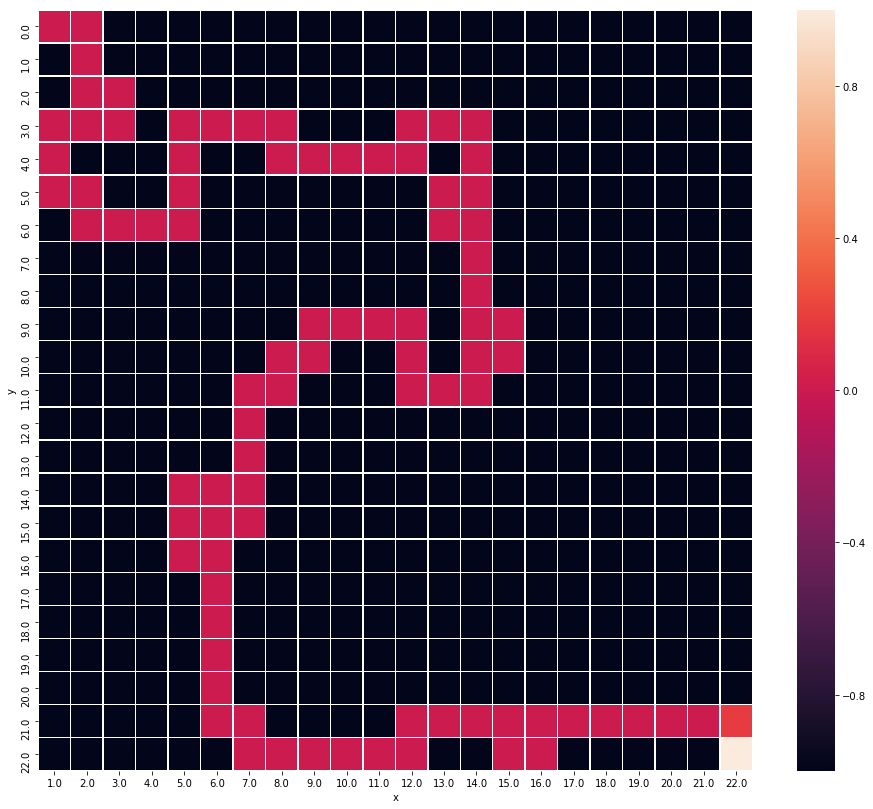

In [50]:
fig = plt.figure(figsize=(16, 14))
sns.heatmap(
    result_df.drop_duplicates(["x", "y"]).pivot(columns="x", index="y", values="q_value").fillna(-1),
    linewidths=.5
)
plt.show();plt.close()

In [49]:
result_df.to_csv("result.csv", index=False)